In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("bill_authentication.csv")

In [31]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Outcome
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [32]:
df.tail()

,Variance,Skewness,Curtosis,Entropy,Outcome
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Outcome   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [34]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Outcome
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [35]:
df.isnull()

,Variance,Skewness,Curtosis,Entropy,Outcome
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


In [36]:
df.shape

(1372, 5)

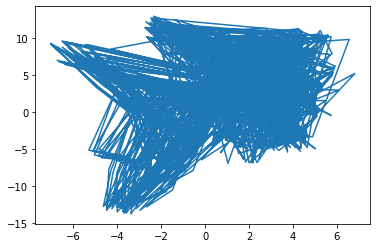

In [37]:
x=df.Variance
y= df.Skewness
plt.plot(x,y)

<BarContainer object of 1372 artists>

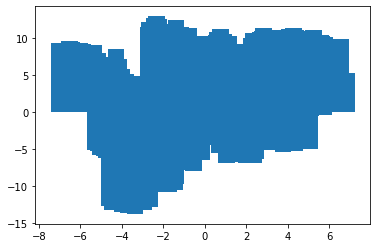

In [38]:
x=df.Variance
y= df.Skewness
plt.bar(x,y)

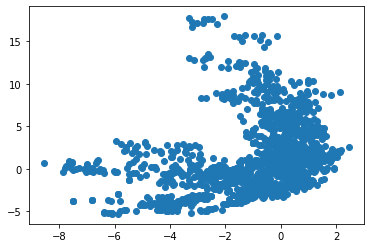

In [39]:
x=df.Entropy
y= df.Curtosis
plt.scatter(x,y)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [41]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

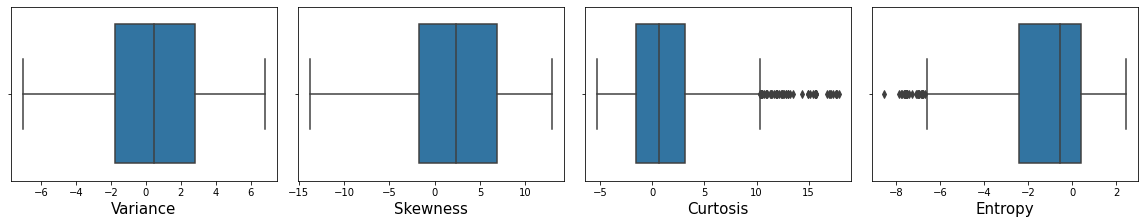

In [42]:
plt.figure(figsize = (20,15))
plotnumber = 1
for col in df.columns:
  if plotnumber <=4:
    ax = plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col,fontsize = 15)
  plotnumber +=1
plt.tight_layout()
plt.show()

In [43]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [44]:
# Missing Values
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Outcome     0
dtype: int64

In [45]:
import missingno as msno

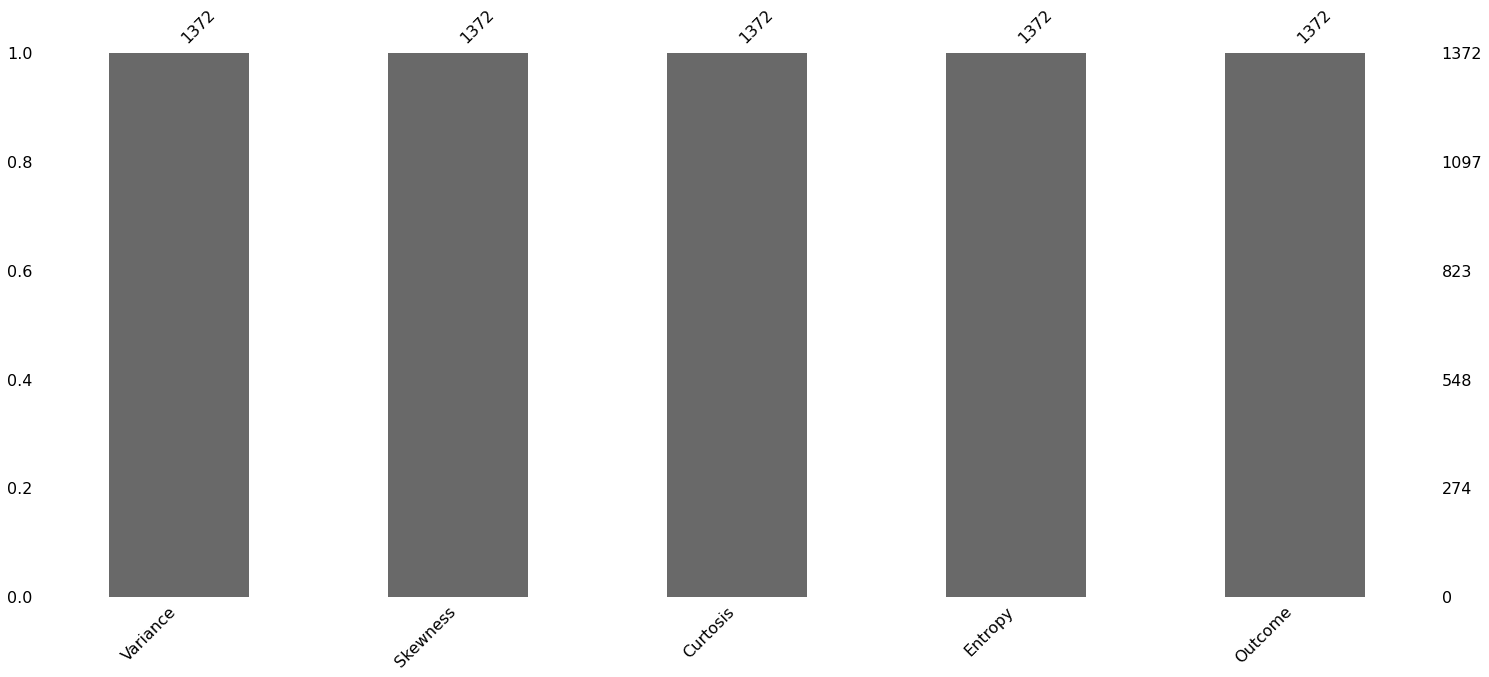

In [46]:
msno.bar(df)
plt.show()

In [47]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size = 0.5, random_state = 0)

In [48]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [49]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
Y_pred =clf.predict(X_test)

In [51]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[377,   8],
       [ 10, 291]])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9737609329446064

In [54]:
from sklearn.tree import export_graphviz 
import graphviz

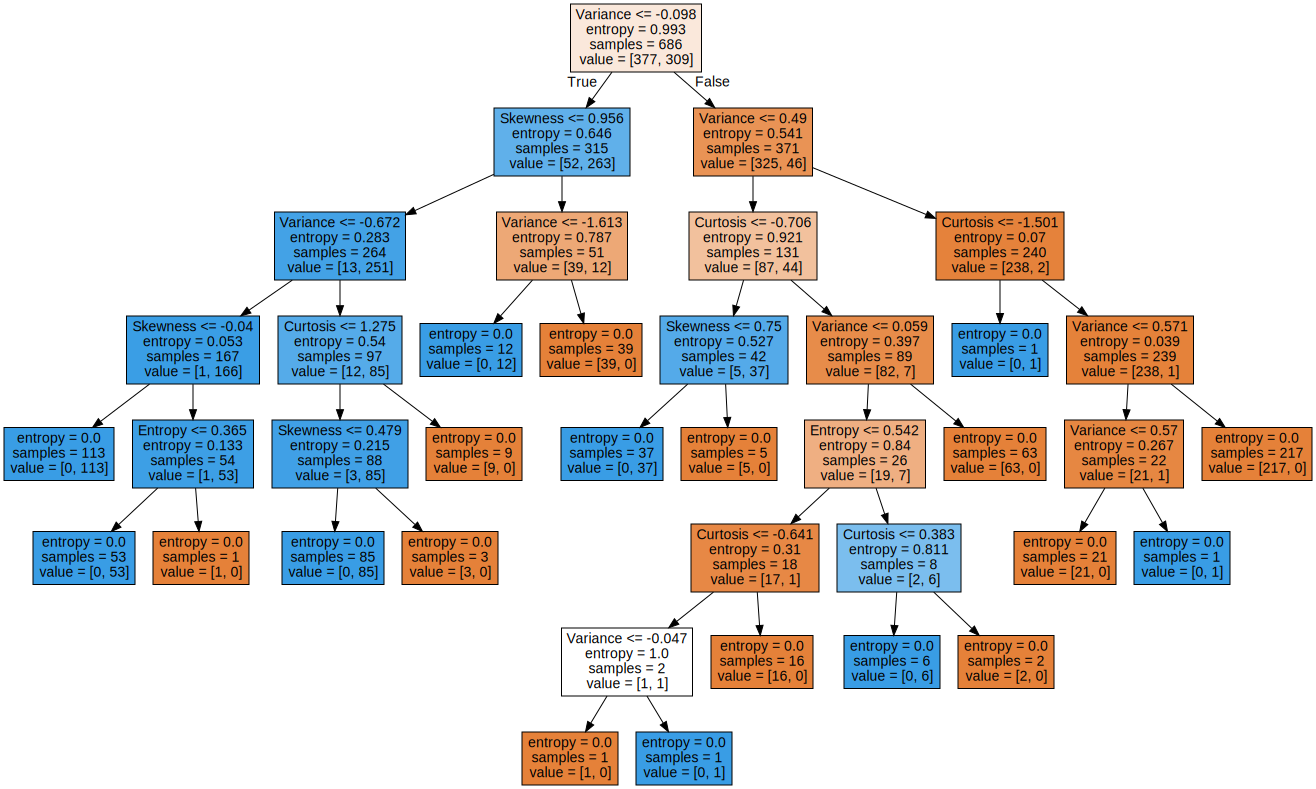

In [55]:
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))

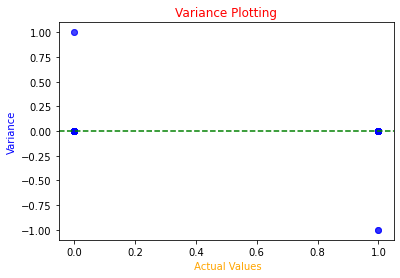

In [59]:
variance = Y_pred - Y_test
fig, ax = plt.subplots()
ax.scatter(Y_test, variance, color='blue', alpha=0.15)
ax.axhline(y=0, color='green', linestyle='--')
ax.set_xlabel(' Actual Values',color="orange")
ax.set_ylabel('Variance',color="blue")
ax.set_title('Variance Plotting',color="red")
plt.show()

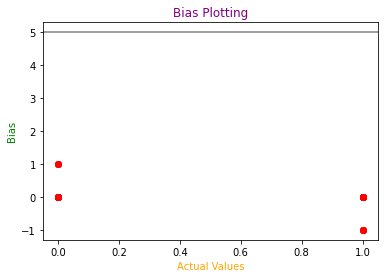

In [60]:
bias = Y_pred - Y_test
fig, ax = plt.subplots()
ax.scatter(Y_test, bias, color='red', alpha=0.4)
ax.axhline(y=5, color='grey', linestyle='-')
ax.set_xlabel('Actual Values',color="orange")
ax.set_ylabel('Bias',color='green')
ax.set_title('Bias Plotting',color='purple')
plt.show()